# dependencias 

In [1]:
from youtube_transcript_api import YouTubeTranscriptApi
import youtube_dl
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from wordcloud import WordCloud
from itertools import combinations
import igraph as ig

# funciones extraccion de datos

In [ ]:
def obtener_enlaces_lista_reproduccion(url_lista):
    # Configuración de youtube_dl para obtener solo los enlaces de la lista de reproducción
    ydl_opts = {'extract_flat': True}

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        # Obtener información de la lista de reproducción
        playlist_info = ydl.extract_info(url_lista, download=False)
        
        # Extraer los enlaces de los videos de la lista de reproducción
        enlaces = [video['url'] for video in playlist_info['entries']]

    return enlaces

def obtener_subtitulos_video(url_video):
    try:
        srt = YouTubeTranscriptApi.get_transcript(url_video, languages=['es'])
        subtitulos = [i['text'] for i in srt]
        subtitulos = ' '.join(subtitulos)
        return subtitulos
    except:
        return None

def obtener_subtitulos_videos(lista_enlaces):
    subtitulos = []
    for enlace in lista_enlaces:
        sub = obtener_subtitulos_video(enlace)
        if sub:
            subtitulos.append(sub)
    return subtitulos

In [ ]:
# lista de los url caso 6
lista_enlaces_caso_6 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH')
# obtener los subtitulos de los videos caso 6
subtitulos_caso_6 = obtener_subtitulos_videos(lista_enlaces_caso_6)
# lista de los url caso 7 por lista de reproduccion
lista_enlaces_caso_7_lista_1 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4I3jzi1nnExmLhDPP2_63yr')
lista_enlaces_caso_7_lista_2 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4K-BNKcKeV4nsvklh1Qi601')
lista_enlaces_caso_7_lista_3 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4In21BprlyQuW8u0oL6lTXS')
# obtener los subtitulos de los videos caso 7 por lista de reproduccion
subtitulos_caso_7_lista_1 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_1)
subtitulos_caso_7_lista_2 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_2)
subtitulos_caso_7_lista_3 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_3)

[youtube:tab] PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH: Downloading webpage
[download] Downloading playlist: Caso 06 de la JEP | Unión Patriótica (UP)
[youtube:tab] Downloading page 1
[youtube:tab] playlist Caso 06 de la JEP | Unión Patriótica (UP): Downloading 22 videos
[download] Downloading video 1 of 22
[download] Downloading video 2 of 22
[download] Downloading video 3 of 22
[download] Downloading video 4 of 22
[download] Downloading video 5 of 22
[download] Downloading video 6 of 22
[download] Downloading video 7 of 22
[download] Downloading video 8 of 22
[download] Downloading video 9 of 22
[download] Downloading video 10 of 22
[download] Downloading video 11 of 22
[download] Downloading video 12 of 22
[download] Downloading video 13 of 22
[download] Downloading video 14 of 22
[download] Downloading video 15 of 22
[download] Downloading video 16 of 22
[download] Downloading video 17 of 22
[download] Downloading video 18 of 22
[download] Downloading video 19 of 22
[download] Downloadin

In [ ]:
caso_6='\n'.join(subtitulos_caso_6)
caso_7_1='\n'.join(subtitulos_caso_7_lista_1)
caso_7_2='\n'.join(subtitulos_caso_7_lista_2)
caso_7_3='\n'.join(subtitulos_caso_7_lista_3)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_16424\2035718078.py", line 1, in <module>
    caso_6='\n'.join(subtitulos_caso_6)
                     ^^^^^^^^^^^^^^^^^
NameError: name 'subtitulos_caso_6' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

In [ ]:
# guardamos los subtitulos en archivos de texto
with open('../input/caso_6.txt', 'w') as f:
    f.write(caso_6)
with open('../input/caso_7_1.txt', 'w') as f:
    f.write(caso_7_1)
with open('../input/caso_7_2.txt', 'w') as f:
    f.write(caso_7_2)
with open('../input/caso_7_3.txt', 'w') as f:
    f.write(caso_7_3)

In [ ]:
print(len(subtitulos_caso_6),len(subtitulos_caso_7_lista_1),len(subtitulos_caso_7_lista_2),len(subtitulos_caso_7_lista_3),sep='\n') # 6/7/7/7


20
28
15
13


# limpieza de datos 

In [2]:
# leer los txt
with open('../input/caso_6.txt', 'r') as f:
    subtitulos_caso_6 = f.read()
with open('../input/caso_7_1.txt', 'r') as f:
    subtitulos_caso_7_lista1 = f.read()
with open('../input/caso_7_2.txt', 'r') as f:
    subtitulos_caso_7_lista2 = f.read()
with open('../input/caso_7_3.txt', 'r') as f:
    subtitulos_caso_7_lista3 = f.read()



In [3]:
subtitulos_caso_7 = '\n'.join([subtitulos_caso_7_lista1,subtitulos_caso_7_lista2,subtitulos_caso_7_lista3])

## funciones para la limpieza de datos

In [4]:
nltk.download('punkt')
def normalizacion_regex_texto(texto):
    # Eliminar caracteres o palabras entre [] y ()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'\(.*?\)', '', texto)
    # eliminar letras individuales 
    texto = re.sub(r'\b\w\b', '', texto)
    # minimizar, limpieza de espacios, eliminacion de puntuacion  
    palabras = nltk.tokenize.word_tokenize(texto)
    palabras = [palabra.lower() for palabra in palabras if palabra.isalpha()]
    texto = ' '.join(palabras)
    # eliminar acentos o tildes
    texto = re.sub(r'[áéíóúÁÉÍÓÚ]', lambda x: 'aeiouAEIOU'['áéíóúÁÉÍÓÚ'.index(x.group(0))], texto)
    
    return texto

def contar_palabras_con_numeros(texto):
    # Encuentra todas las palabras que contienen al menos un número
    palabras_con_numeros = re.findall(r'\b\w*\d\w*\b', texto)
    
    # Inicializa un diccionario para el conteo de palabras
    conteo_palabras = {}
    
    # Itera sobre las palabras encontradas y cuenta cada una
    for palabra in palabras_con_numeros:
        if palabra in conteo_palabras:
            conteo_palabras[palabra] += 1
        else:
            conteo_palabras[palabra] = 1
    return conteo_palabras

def eliminar_texto_con_numeros(texto):
    texto = re.sub(r'\b\w*\d\w*\b', '', texto)
    return texto

def eliminar_stop_words(texto,stop_words):
    '''eliminar stopwords'''
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]
    texto = ' '.join(palabras)
    return texto

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# implementacion

In [5]:
# conteo de palabras
conteo_palabras_caso_7 = contar_palabras_con_numeros(subtitulos_caso_7[0])
# eliminar texto con numeros
subtitulos_caso_7= eliminar_texto_con_numeros(subtitulos_caso_7.replace('\n',' '))
# normalizar texto
subtitulos_caso_7 = normalizacion_regex_texto(subtitulos_caso_7)
# eliminar stopwords
## cargamos las palabras 
with open('../input/stop_words_taller4.txt','r') as f:
    stop_words = f.read().splitlines()
subtitulos_caso_7 = eliminar_stop_words(subtitulos_caso_7,stop_words)

In [6]:
# conteo de palabras
conteo_palabras_caso_6 = contar_palabras_con_numeros(subtitulos_caso_6[0])
# eliminar texto con numeros
subtitulos_caso_6= eliminar_texto_con_numeros(subtitulos_caso_6.replace('\n',' '))
# normalizar texto
subtitulos_caso_6 = normalizacion_regex_texto(subtitulos_caso_6)
# eliminar stopwords
## cargamos las palabras 
with open('../input/stop_words_taller4.txt','r') as f:
    stop_words = f.read().splitlines()
subtitulos_caso_6 = eliminar_stop_words(subtitulos_caso_6,stop_words)

In [7]:
print(len(subtitulos_caso_7),len(subtitulos_caso_6),sep='\n') # 6/7/7/7

3353865
1483891


# frecuecia de las palabras

## funciones necesarias 

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

def plot_top_words(text, num_words=100):
    '''Genera un gráfico de barras con las palabras más comunes en un texto luego de ser limpiado y tokenizado.'''
    # separar el texto en palabras
    words = text.split(' ')
    words = [word.lower() for word in words if word.isalpha()]
    # Contar la frecuencia de cada palabra
    word_freq = Counter(words)

    # Obtener las palabras más comunes
    top_words = word_freq.most_common(num_words)

    # Preparar datos para el gráfico
    words, freq = zip(*top_words)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 10))
    plt.barh(range(len(words)), freq, align='center')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén en la parte superior
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title(f'Top {num_words} palabras más usadas')
    plt.show()
def plot_wordcloud(text, max_words=10):
    # Genera un contador de las palabras en el texto
    word_counts = Counter(text.split())

    # Obtiene las 'max_words' palabras más comunes
    most_common_words = dict(word_counts.most_common(max_words))

    # Genera la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

    # Crea la figura de Matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## implementacion 

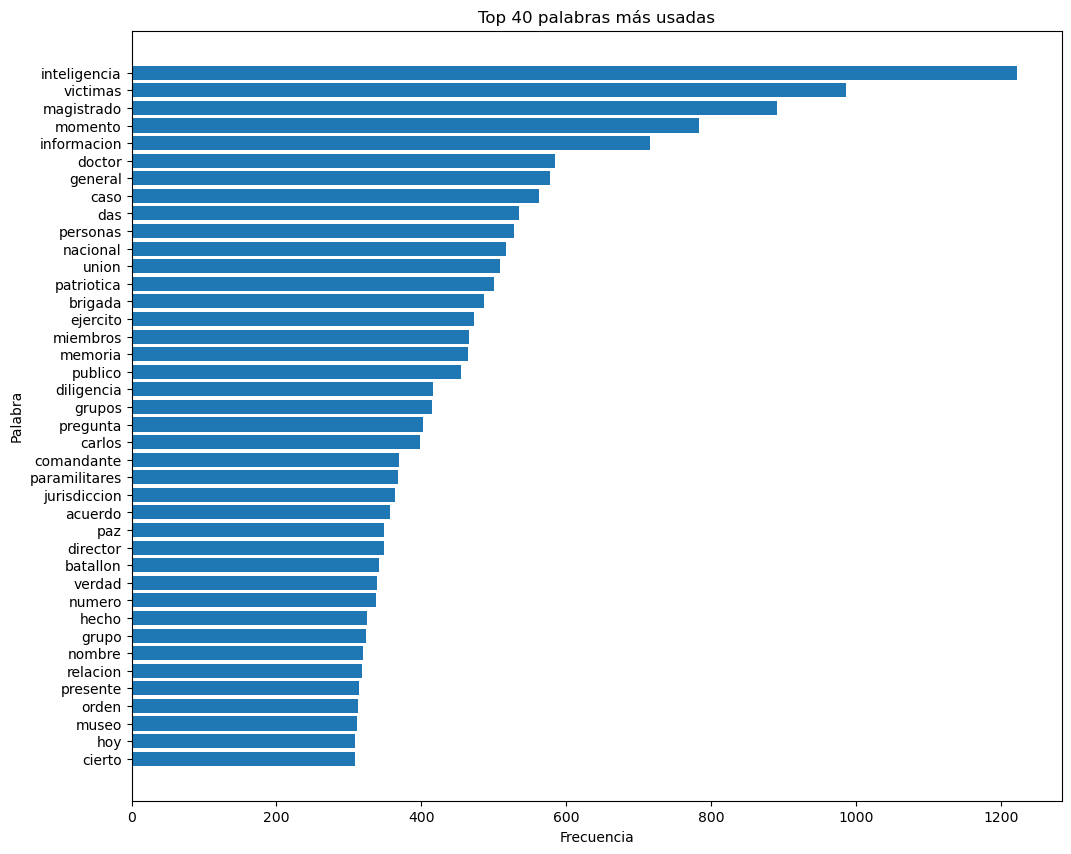

In [9]:
# Generar el gráfico

plot_top_words(subtitulos_caso_6,40)

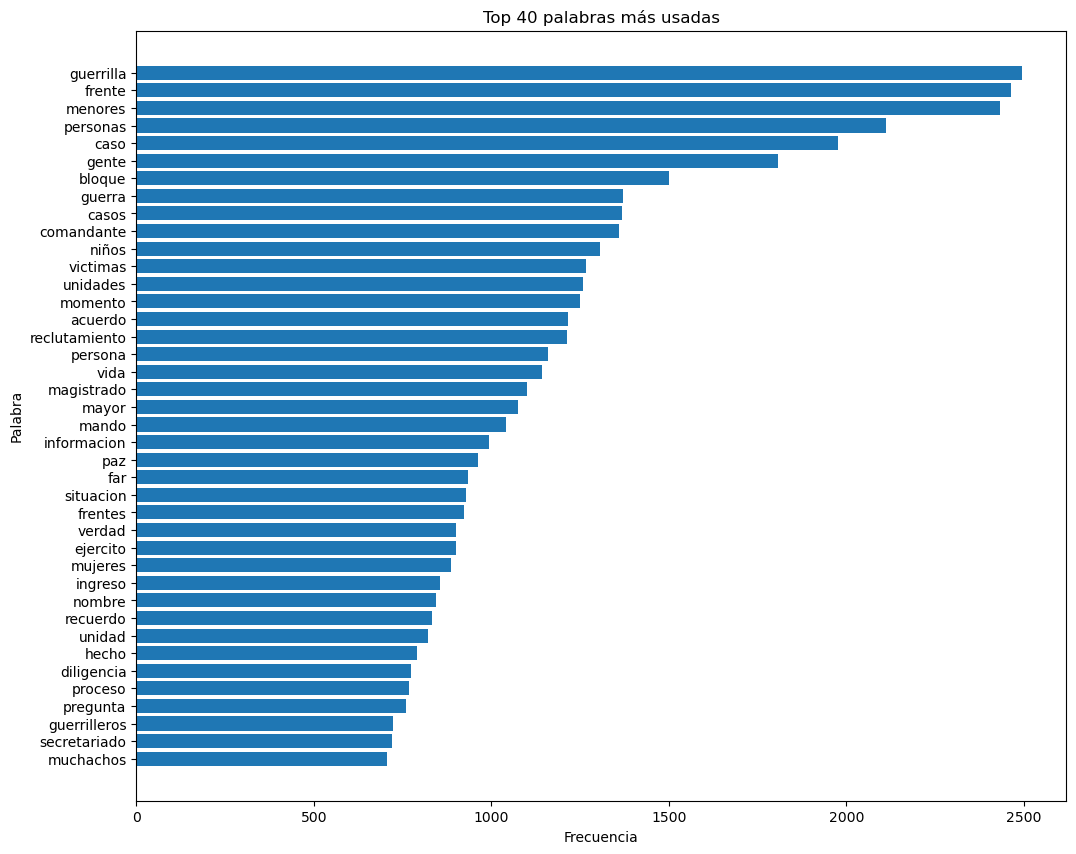

In [10]:
plot_top_words(subtitulos_caso_7,40)

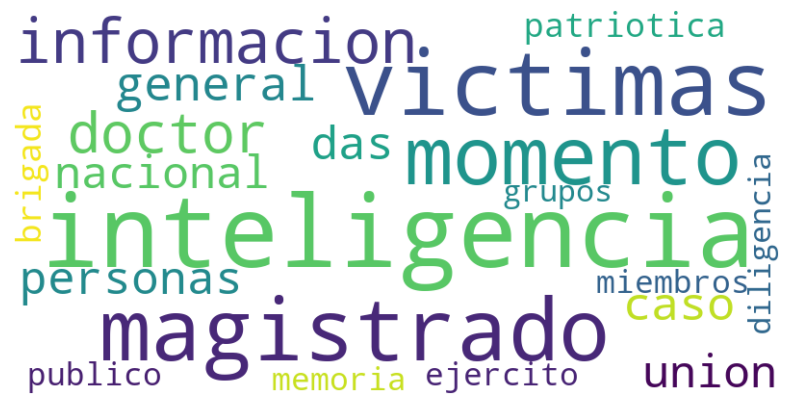

In [11]:
plot_wordcloud(subtitulos_caso_6, max_words=20)


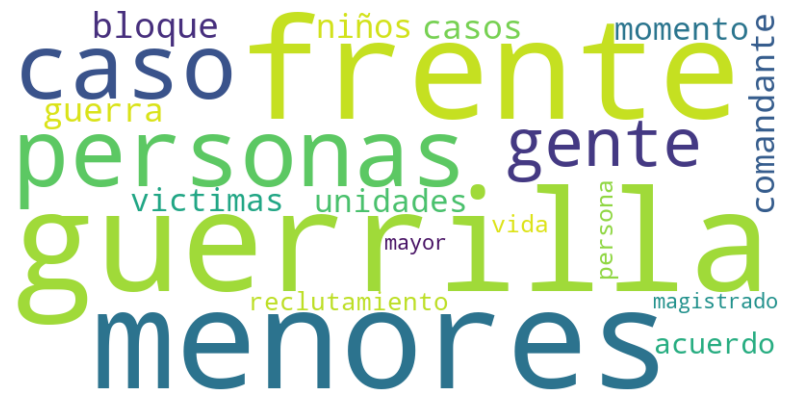

In [12]:
plot_wordcloud(subtitulos_caso_7, max_words=20)

# creacion de bigramas 

## Funciones para skipgramas

In [13]:
def Generacion_de_skipgramas(text, n_palabras, k_saltos):
    '''Genera skipgrams de un texto dado con un tamaño de ventana n y un número de skips k.'''
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Initialize list to store skipgrams
    skipgrams_list = []
    
    # Generate skipgrams
    for i in range(len(words)):
        # Create combinations of words with skips
        skipgrams = combinations(words[i:i+n_palabras+k_saltos], n_palabras)
        skipgrams_list.extend(skipgrams)
    
    return skipgrams_list

def plot_bigramas(skipgramas,top_n=10):
    # Conteo de bigramas
    conteo_bigramas = Counter(skipgramas)

    # Obtener los 10 bigramas más frecuentes
    bigramas_mas_frecuentes = conteo_bigramas.most_common(top_n)

    # Obtener datos para el gráfico
    bigramas_unicos = [bigrama[0] for bigrama in bigramas_mas_frecuentes]
    frecuencias = [frecuencia for _, frecuencia in bigramas_mas_frecuentes]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Bigramas más Frecuentes')
    plt.show()

# implementacion 

In [140]:
# Generar skipgrams
skipgrams_caso_6 = Generacion_de_skipgramas(subtitulos_caso_6, n_palabras=2, k_saltos=0)
skipgrams_caso_7 = Generacion_de_skipgramas(subtitulos_caso_7, n_palabras=2, k_saltos=0)

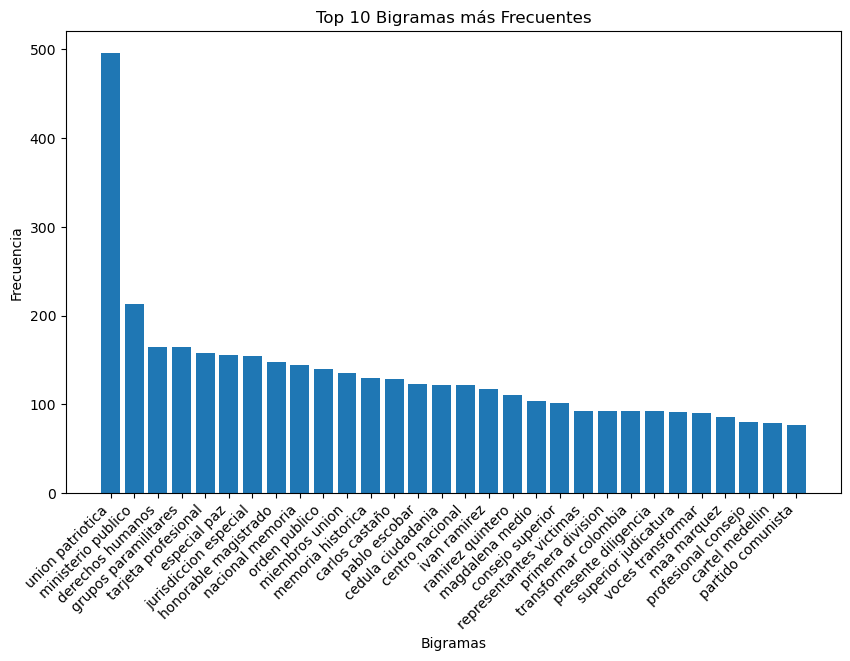

In [141]:
# Ejemplo de uso:
plot_bigramas(skipgrams_caso_6,30)

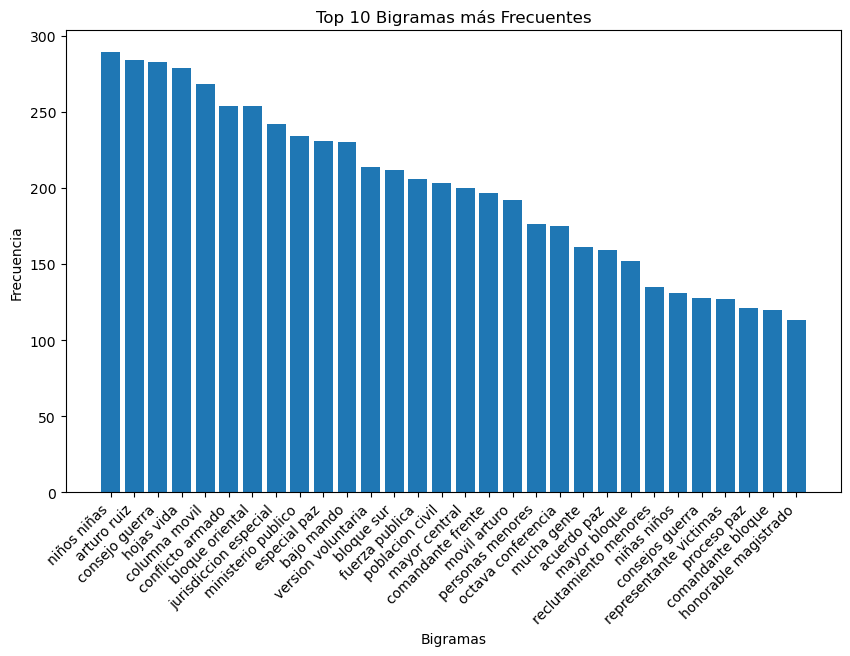

In [142]:
# Ejemplo de uso:
plot_bigramas(skipgrams_caso_7,30)

# generacion de grafos

## funciones

In [143]:
from collections import defaultdict

def frecuencia_bigramas(lista_bigramas, umbral):
    # Utilizamos Counter para contar las ocurrencias de las tuplas en la lista
    lista_bigramas = [tuple(sorted(tupla)) for tupla in lista_bigramas]
    contador = Counter(lista_bigramas)
    
    # Filtramos las tuplas que tienen una frecuencia mayor que el umbral
    tuplas_filtradas = [(tupla , frecuencia)for tupla, frecuencia in contador.items() if frecuencia > umbral]
    
    return tuplas_filtradas

def bigramas_para_grafo(lista_bigramas, umbral=10):
    # Utilizamos Counter para contar las ocurrencias de las tuplas en la lista
    lista_bigramas = [tuple(sorted(tupla)) for tupla in lista_bigramas]
    contador = Counter(lista_bigramas)
    
    # Filtramos las tuplas que tienen una frecuencia mayor que el umbral
    tuplas_filtradas = [(tupla ,frecuencia)for tupla, frecuencia in contador.items() if frecuencia > umbral]
    
    return tuplas_filtradas

# implementacion 

In [144]:
print(skipgrams_caso_6[0:10], skipgrams_caso_7[0:10] ,sep='\n')

[('hablen', 'listo'), ('listo', 'siendo'), ('siendo', 'mañana'), ('mañana', 'lunes'), ('lunes', 'diciembre'), ('diciembre', 'escrito'), ('escrito', 'auxiliar'), ('auxiliar', 'judicial'), ('judicial', 'despacho'), ('despacho', 'magistrado')]
[('hoy', 'octubre'), ('octubre', 'encuentra'), ('encuentra', 'presente'), ('presente', 'union'), ('union', 'penella'), ('penella', 'sala'), ('sala', 'reconocimiento'), ('reconocimiento', 'jurisdiccion'), ('jurisdiccion', 'especial'), ('especial', 'paz')]


In [185]:
bigramas_para_grafos_caso_6 = bigramas_para_grafo(skipgrams_caso_6,20)
bigramas_para_grafos_caso_7 = bigramas_para_grafo(skipgrams_caso_7,40)

In [186]:
print(len(bigramas_para_grafos_caso_6),len(bigramas_para_grafos_caso_7))

223 199


In [187]:
print(bigramas_para_grafos_caso_6[:10],bigramas_para_grafos_caso_7[:10],sep='\n')

[(('auxiliar', 'judicial'), 25), (('despacho', 'magistrado'), 36), (('gustavo', 'magistrado'), 62), (('gustavo', 'salazar'), 53), (('diligencia', 'version'), 21), (('version', 'voluntaria'), 52), (('compareciente', 'ivan'), 25), (('ivan', 'ramirez'), 117), (('quintero', 'ramirez'), 112), (('miembros', 'victimizacion'), 47)]
[(('reconocimiento', 'sala'), 95), (('especial', 'jurisdiccion'), 242), (('especial', 'paz'), 231), (('caso', 'numero'), 103), (('caso', 'reclutamiento'), 44), (('reclutamiento', 'utilizacion'), 87), (('niñas', 'utilizacion'), 74), (('niñas', 'niños'), 420), (('armado', 'conflicto'), 254), (('acreditadas', 'victimas'), 47)]


In [188]:
import igraph as ig

def creacion_del_grafo(aristas):
    # Crear un grafo
    G = ig.Graph()

    # Conjunto de nodos existentes
    nodos_existentes = set()

    # Añadir las aristas al grafo
    for arista, peso in aristas:
        nodo1, nodo2 = arista

        if nodo1 != nodo2: 

            # Verificar si los nodos ya existen
            if nodo1 not in nodos_existentes:
                G.add_vertex(nodo1)  # Agregar vértice origen
                nodos_existentes.add(nodo1)  # Agregar nodo al conjunto de nodos existentes
            if nodo2 not in nodos_existentes:
                G.add_vertex(nodo2)  # Agregar vértice destino
                nodos_existentes.add(nodo2)  # Agregar nodo al conjunto de nodos existentes

            # Agregar arista con peso
            G.add_edge(nodo1, nodo2, weight=peso)

    return G

In [189]:
G_caso_6 = creacion_del_grafo(bigramas_para_grafos_caso_6)
G_caso_7 = creacion_del_grafo(bigramas_para_grafos_caso_7)

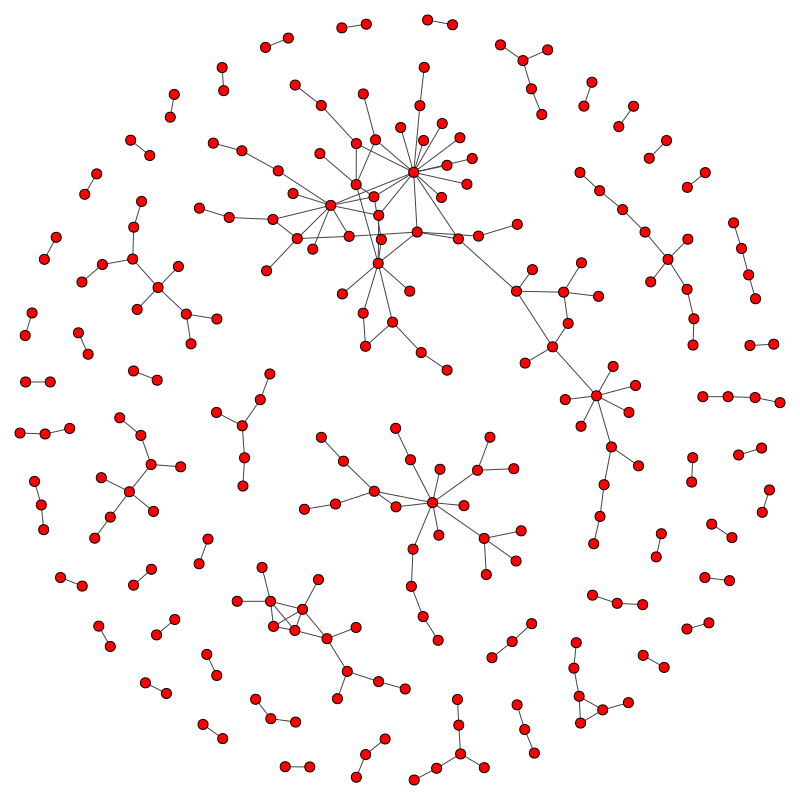

In [190]:

layout=G_caso_6.layout_kamada_kawai()
ig.plot(G_caso_6,vertex_size=10, bbox=(800,800))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_13596\2197611427.py", line 13, in <module>
    ig.plot(grafo, vertex_color=[colores[gr] for gr in grados])
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_13596\2197611427.py", line 13, in <listcomp>
    ig.plot(grafo, vertex_color=[colores[gr] for gr in grados])
                                 ~~~~~~~^^^^
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\igraph\drawing\colors.py", line 95, in get
    raise IndexError("color index too large")
IndexError: color index too large

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packa

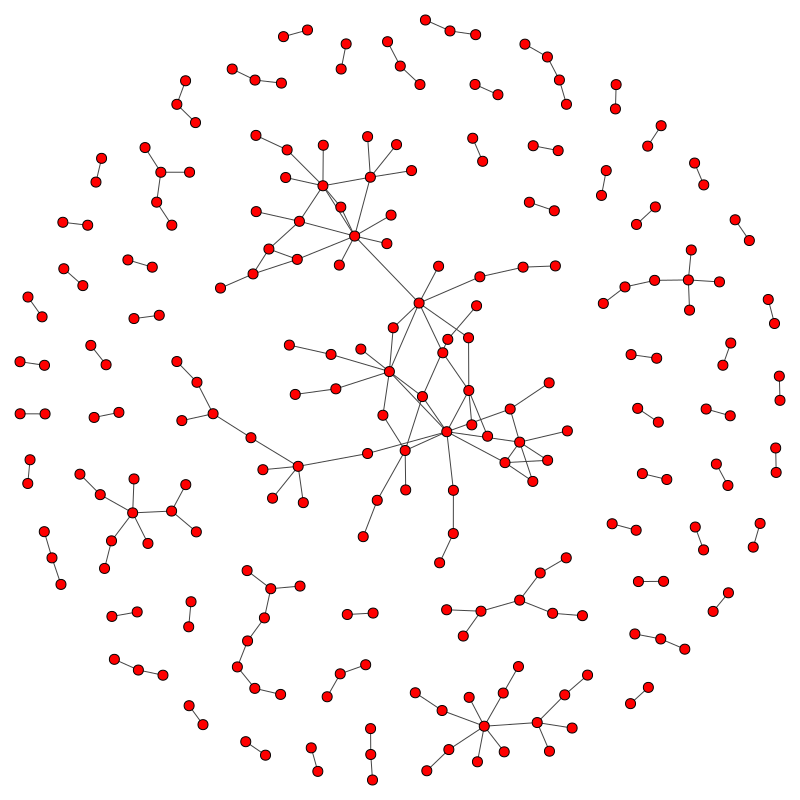

In [191]:
layout=G_caso_7.layout_kamada_kawai()
ig.plot(G_caso_7,vertex_size=10, bbox=(800,800))

In [192]:
import igraph as ig
from plotly.offline import plot
import plotly.graph_objs as go

node_degrees = G_caso_6.degree()

# Obtener las posiciones de los nodos utilizando el algoritmo de Fruchterman-Reingold
layout = G_caso_6.layout_fruchterman_reingold()

# Obtener las aristas y los nodos
edge_x = []
edge_y = []
for edge in G_caso_6.get_edgelist():
    x0, y0 = layout[edge[0]]
    x1, y1 = layout[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x = [pos[0] for pos in layout]
node_y = [pos[1] for pos in layout]

# Obtener los nombres de los nodos
node_names = G_caso_6.vs['name']

# Crear los trazos para los nodos y aristas
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_names,  # Usamos los nombres de los nodos como texto de la etiqueta
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_degrees,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

# Crear el gráfico
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Grafo de igraph con Plotly',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                width=850,  # Ancho del gráfico
                height=800  # Altura del gráfico
                ))

# Mostrar el gráfico
fig.show()

In [193]:
node_degrees = G_caso_7.degree()

# Obtener las posiciones de los nodos utilizando el algoritmo de Fruchterman-Reingold
layout = G_caso_7.layout_fruchterman_reingold()

# Obtener las aristas y los nodos
edge_x = []
edge_y = []
for edge in G_caso_7.get_edgelist():
    x0, y0 = layout[edge[0]]
    x1, y1 = layout[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x = [pos[0] for pos in layout]
node_y = [pos[1] for pos in layout]

# Obtener los nombres de los nodos
node_names = G_caso_7.vs['name']

# Crear los trazos para los nodos y aristas
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_names,  # Usamos los nombres de los nodos como texto de la etiqueta
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_degrees,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

# Crear el gráfico
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Grafo de igraph con Plotly',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                width=850,  # Ancho del gráfico
                height=800  # Altura del gráfico
                ))

# Mostrar el gráfico
fig.show()